# CNN model for classification of Gemstones images

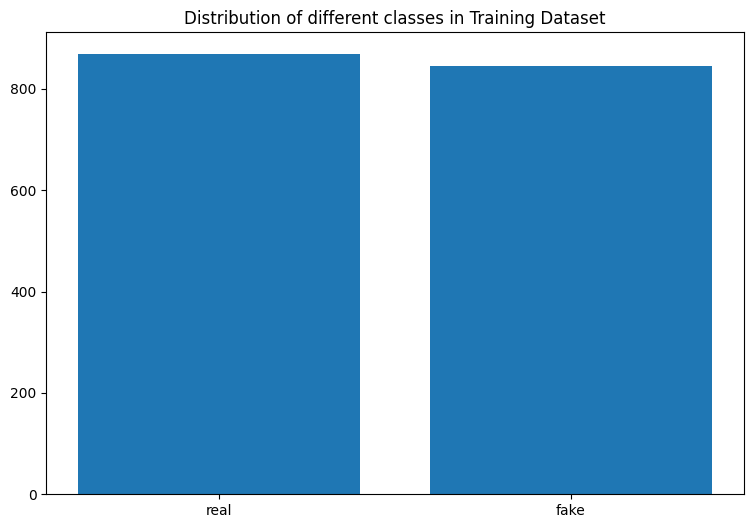

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import os

image_folder = ['real', 'fake']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/kaggle/input/dataset-cnn/gemstone_CNN_dataset/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [2]:
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/kaggle/input/dataset-cnn/gemstone_CNN_dataset/train/'+i+'/'))))

Training real images are: 868
Training fake images are: 845


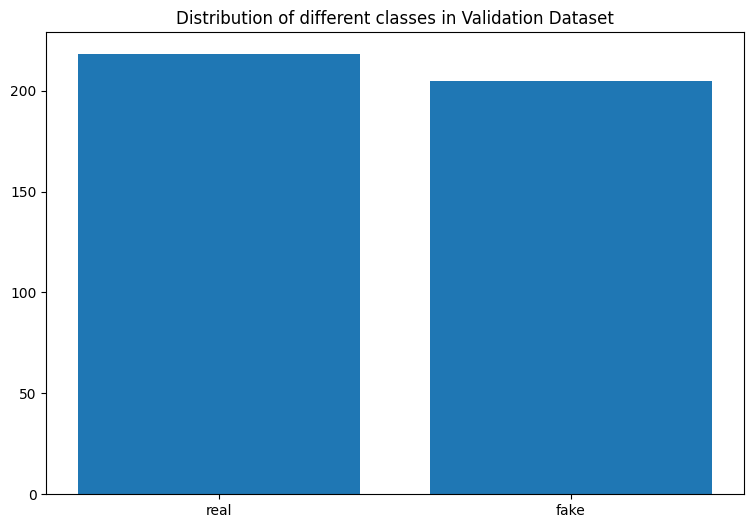

In [3]:
image_folder = ['real', 'fake']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/kaggle/input/dataset-cnn/gemstone_CNN_dataset/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [4]:
for i in  ['real', 'fake']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/kaggle/input/dataset-cnn/gemstone_CNN_dataset/validation/'+i+'/'))))

Valid real images are: 218
Valid fake images are: 205


In [5]:
import tensorflow.keras.backend as K
K.clear_session()

2024-12-30 15:07:47.385186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-30 15:07:47.385314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-30 15:07:47.503056: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
import warnings
warnings.filterwarnings("ignore", message="Unable to register cuDNN factory")
warnings.filterwarnings("ignore", message="Unable to register cuFFT factory")
warnings.filterwarnings("ignore", message="Unable to register cuBLAS factory")


In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf


In [8]:
# hyper parameters 
img_width=128; img_height=128
batch_size=64    

In [9]:

TRAINING_DIR = '/kaggle/input/dataset-cnn/gemstone_CNN_dataset/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width)
                                                   )

Found 1713 images belonging to 2 classes.


In [10]:
VALIDATION_DIR = '/kaggle/input/dataset-cnn/gemstone_CNN_dataset/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 423 images belonging to 2 classes.


In [11]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/kaggle/working/CNN_aug_best_weights.keras'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [12]:

# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
# #     Conv2D(256, (3, 3), activation='relu'),
# #     Conv2D(256, (3, 3), activation='relu'),
# #     Conv2D(256, (3, 3), activation='relu'),
# #     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dropout(0.4),
#     Dense(2, activation='softmax')
   
# ])
# model.summary()

model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
    MaxPooling2D(2, 2),
    Conv2D(16, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),  # Reduced number of units
    Dropout(0.5),  # Adjusted dropout rate
    Dense(2, activation='softmax')  # Output layer for 2 classes
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,634 (1.56 MB)

 Trainable params: 407,634 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [14]:
history = model.fit(train_generator,
                              epochs=70,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/70


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-30 15:08:08.130248: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47635: 7.06857, expected 6.24077
2024-12-30 15:08:08.130296: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47660: 7.13096, expected 6.30316
2024-12-30 15:08:08.130306: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47670: 6.59614, expected 5.76833
2024-12-30 15:08:08.130314: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47689: 6.95438, expected 6.12657
2024-12-30 15:08:08.130322: E external/local_xla/xla/service/gpu/buffer_

 1/27 ━━━━━━━━━━━━━━━━━━━━ 4:20 10s/step - accuracy: 0.4688 - loss: 0.8073

I0000 00:00:1735571291.244307      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/27 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.5119 - loss: 0.8612

2024-12-30 15:08:20.877700: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.89142, expected 6.08945
2024-12-30 15:08:20.877767: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 42: 6.1285, expected 5.32653
2024-12-30 15:08:20.877777: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43: 6.74785, expected 5.94588
2024-12-30 15:08:20.877785: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 52: 6.89522, expected 6.09325
2024-12-30 15:08:20.877793: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 78: 6.80953, expected 6.00757
2024-12-30 15:08:20.877801: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 79: 6.51645, expected 5.71448
2024-12-30 15:08:20.877808: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 80: 6.72158, expected 5.91961
2024-12-30 15:08:20.877816: E external/local_xla/x

27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 589ms/step - accuracy: 0.5140 - loss: 0.8301 - val_accuracy: 0.5154 - val_loss: 0.6828
Epoch 2/70


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - accuracy: 0.5260 - loss: 0.6953 - val_accuracy: 0.6454 - val_loss: 0.6639
Epoch 3/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.5425 - loss: 0.6875 - val_accuracy: 0.5508 - val_loss: 0.6673
Epoch 4/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.5380 - loss: 0.6871 - val_accuracy: 0.6265 - val_loss: 0.6187
Epoch 5/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.5962 - loss: 0.6664 - val_accuracy: 0.6052 - val_loss: 0.6238
Epoch 6/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - accuracy: 0.6253 - loss: 0.6404 - val_accuracy: 0.6194 - val_loss: 0.6294
Epoch 7/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - accuracy: 0.6196 - loss: 0.6556 - val_accuracy: 0.6832 - val_loss: 0.6124
Epoch 8/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.6744 - loss: 0.6120 - val_accuracy: 0.6927 - val_loss: 0.5685
Epoch 9/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.6248 - loss: 0.6335 - val_accuracy: 0.7139 - val

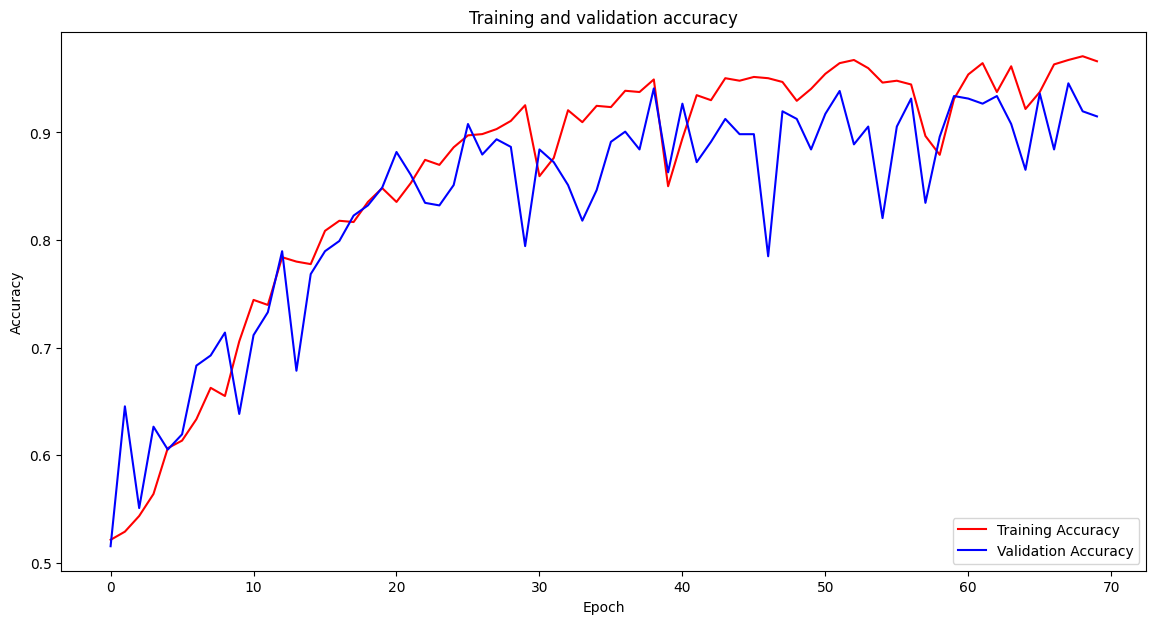

Training Accuracy:  [0.521307647228241, 0.528896689414978, 0.5434909462928772, 0.5639229416847229, 0.6065382361412048, 0.6135435104370117, 0.6333917379379272, 0.6625802516937256, 0.6549912691116333, 0.7057793140411377, 0.7443082332611084, 0.739638090133667, 0.7840046882629395, 0.7799182534217834, 0.7775831818580627, 0.8085230588912964, 0.817863404750824, 0.8166958689689636, 0.8353765606880188, 0.8482195138931274, 0.8353765606880188, 0.8528896570205688, 0.8744891881942749, 0.8698190450668335, 0.8861646056175232, 0.8972562551498413, 0.8984237909317017, 0.9030939936637878, 0.9106830358505249, 0.9252772927284241, 0.8593111634254456, 0.8762404918670654, 0.9206071496009827, 0.9095154404640198, 0.9246935248374939, 0.9235259890556335, 0.9387040138244629, 0.9375364780426025, 0.9492118954658508, 0.849970817565918, 0.8943374156951904, 0.9346176385879517, 0.9299474358558655, 0.9503794312477112, 0.9480443596839905, 0.9515469670295715, 0.9503794312477112, 0.9468768239021301, 0.9293636679649353, 0.94

In [15]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()
print('Training Accuracy: ',acc)

Text(0.5, 1.0, 'Training and validation loss')

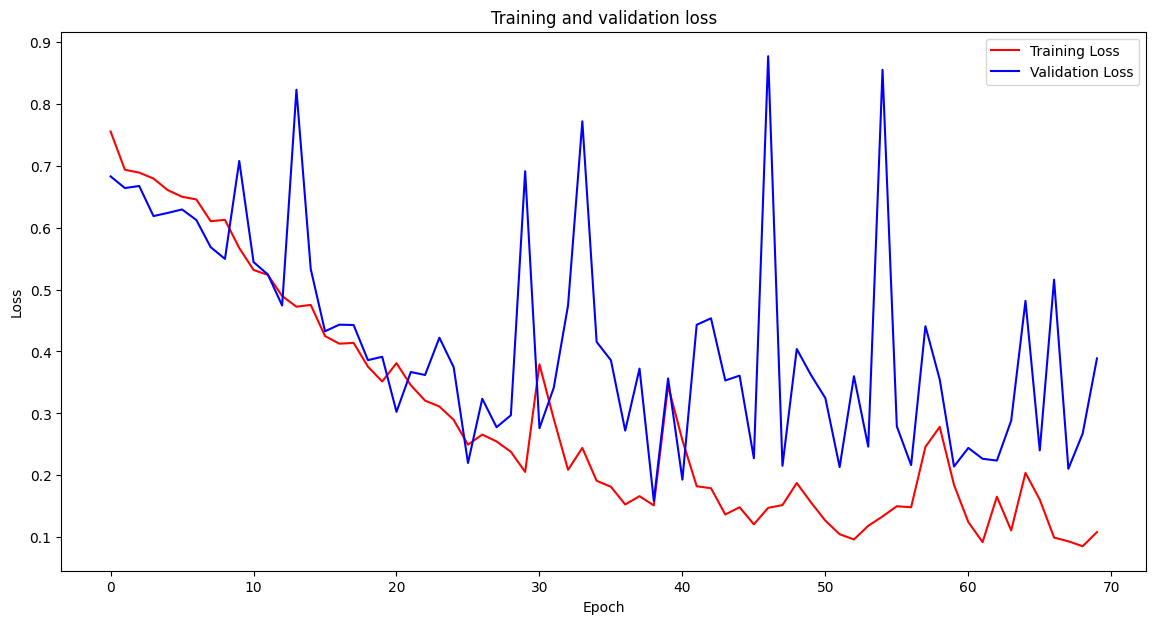

In [16]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [17]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a
     

In [18]:
# Read Test Images Dir and their labels
test_images_dir = '/kaggle/input/dataset-cnn/gemstone_CNN_dataset/test/'
test_df = pd.read_csv('/kaggle/input/dataset-cnn/gemstone_CNN_dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/kaggle/working/test_preproc_CNN.npy', test_preprocessed_images)
     

In [19]:
import tensorflow as tf
tf.config.experimental.enable_op_determinism()

array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1]


In [20]:
test_df = pd.read_csv('/kaggle/input/dataset-cnn/gemstone_CNN_dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)
     

0      1
1      1
2      1
3      1
4      1
      ..
321    1
322    1
323    1
324    1
325    1
Name: labels, Length: 326, dtype: int64


In [21]:
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
test_accuracy = accuracy_score(y_true, answer)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8466257668711656


In [22]:

from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)
     

In [23]:

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat
     

array([[143,   7],
       [ 43, 133]])

In [24]:

train_dir = '/kaggle/input/dataset-cnn/gemstone_CNN_dataset/train/'
classes = os.listdir(train_dir)
     

In [25]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
     


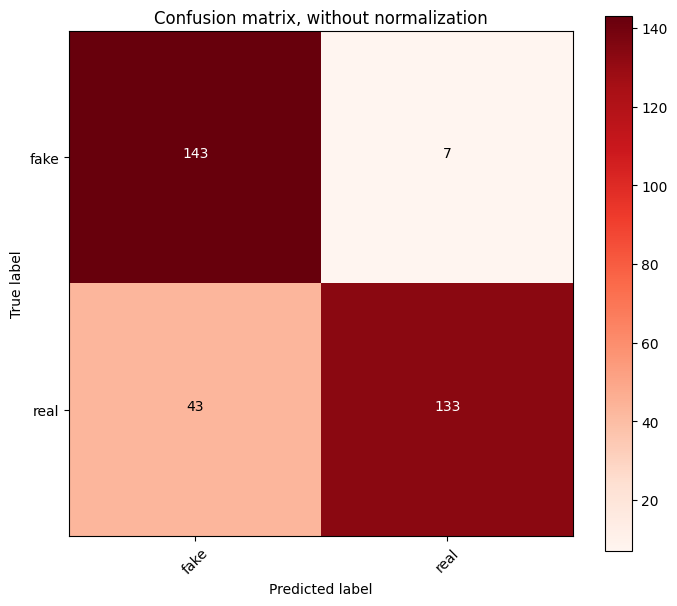

In [26]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()
# plt.imsave('/kaggle/working/Confusion_matrix.jpg'.format('RGB_GAN'), sample_img)

In [27]:
# idx2 = random.randint(0, len(test_images_dir))

# plt.imshow(X_test[idx2, :])

# plt.show()

# y_pred model.predict(X_test[idx2, ].reshape(1, 64, 64, 3))

In [28]:
# from tensorflow.keras.models import load_model

# model.save('/kaggle/working/CNN.hdf5',)